**Breast Cancer Detection**

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [357]:
df = pd.read_csv('breast-cancer-data.csv')

In [358]:
df

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'


In [359]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [361]:
df.columns

Index(['age', 'menopause', 'tumer-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiate', 'class'],
      dtype='object')

In [362]:
df.isna().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [363]:
df.replace('?',np.nan,inplace=True)
df.replace(" ",np.nan,inplace=True)

In [364]:
df.isnull().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [365]:
df['node-caps'].fillna(df['node-caps'].mode()[0],inplace=True)
df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [367]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


Text(0.5, 1.0, 'Age Distribution')

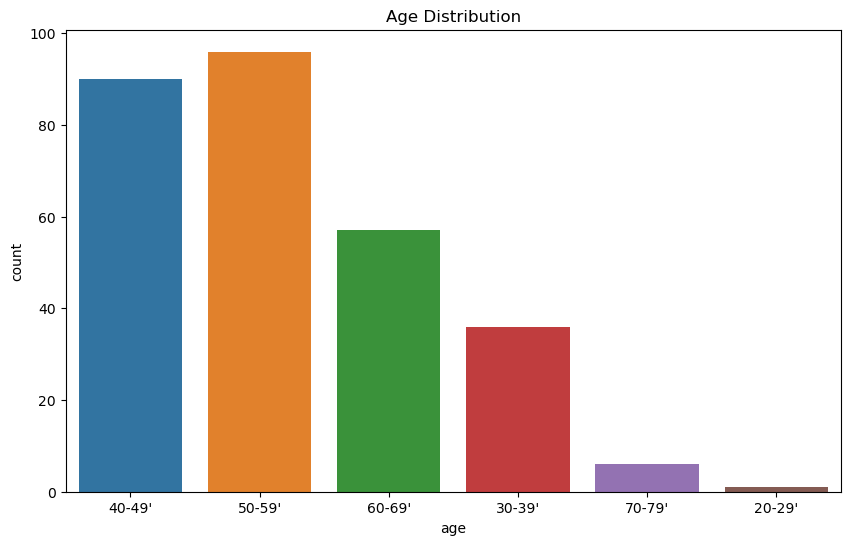

In [368]:
plt.figure(figsize=(10,6))
sns.countplot(x='age',data=df)
plt.title('Age Distribution')

In [369]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['node-caps'] = le.fit_transform(df['node-caps'])
df['irradiate'] = le.fit_transform(df['irradiate'])
df['breast'] = le.fit_transform(df['breast'])
df['menopause'] = le.fit_transform(df['menopause'])
df['class'] = le.fit_transform(df['class'])
df['breast-quad'] = le.fit_transform(df['breast-quad'])
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',2,15-19',0-2',1,3',1,2,0,1
1,50-59',0,15-19',0-2',0,1',1,0,0,0
2,50-59',0,35-39',0-2',0,2',0,1,0,1
3,40-49',2,35-39',0-2',1,3',1,1,1,0
4,40-49',2,30-34',3-5',1,2',0,4,0,1


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    int32 
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    int32 
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    int32 
 7   breast-quad  286 non-null    int32 
 8   irradiate    286 non-null    int32 
 9   class        286 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 15.8+ KB


In [371]:
df['deg-malig'] = df['deg-malig'].astype(str)
df['deg-malig'] = df['deg-malig'].str.replace("'", "").astype(int)



In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    int32 
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    int32 
 5   deg-malig    286 non-null    int32 
 6   breast       286 non-null    int32 
 7   breast-quad  286 non-null    int32 
 8   irradiate    286 non-null    int32 
 9   class        286 non-null    int32 
dtypes: int32(7), object(3)
memory usage: 14.7+ KB


In [373]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',2,15-19',0-2',1,3,1,2,0,1
1,50-59',0,15-19',0-2',0,1,1,0,0,0
2,50-59',0,35-39',0-2',0,2,0,1,0,1
3,40-49',2,35-39',0-2',1,3,1,1,1,0
4,40-49',2,30-34',3-5',1,2,0,4,0,1


In [374]:
cols = ['age','tumer-size','inv-nodes','breast-quad']
for col in cols:
    df[col] = df[col].astype(str).str.replace("'", "")

In [375]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49,2,15-19,0-2,1,3,1,2,0,1
1,50-59,0,15-19,0-2,0,1,1,0,0,0
2,50-59,0,35-39,0-2,0,2,0,1,0,1
3,40-49,2,35-39,0-2,1,3,1,1,1,0
4,40-49,2,30-34,3-5,1,2,0,4,0,1


In [376]:
cols = ['age','tumer-size','inv-nodes','breast-quad']
for col in cols:
    df[col] = le.fit_transform(df[col])
# df = pd.get_dummies(df, columns=['age','tumer-size','inv-nodes'])


In [377]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1


In [378]:
df.columns

Index(['age', 'menopause', 'tumer-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiate', 'class'],
      dtype='object')

In [379]:
# new_label_encode = ['age_20-29', 'age_30-39', 'age_40-49',
#        'age_50-59', 'age_60-69', 'age_70-79', 'tumer-size_0-4',
#        'tumer-size_10-14', 'tumer-size_15-19', 'tumer-size_20-24',
#        'tumer-size_25-29', 'tumer-size_30-34', 'tumer-size_35-39',
#        'tumer-size_40-44', 'tumer-size_45-49', 'tumer-size_5-9',
#        'tumer-size_50-54', 'inv-nodes_0-2', 'inv-nodes_12-14',
#        'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
#        'inv-nodes_9-11'
# ]

# for col in new_label_encode:
#     df[col] = df[col].astype(int)

In [380]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1


In [381]:
X = df.drop('class',axis=1)
y = df['class']

In [382]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=.20,random_state=42)


In [383]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [384]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [385]:
y_test

9      0
267    1
143    0
212    0
227    0
155    0
283    0
73     1
196    1
33     0
185    0
124    0
146    1
265    0
5      0
220    0
233    0
251    0
45     1
268    0
170    1
56     0
200    0
79     0
111    0
275    0
274    0
217    0
109    0
42     0
203    0
84     0
269    0
93     0
46     0
204    0
63     1
75     0
240    1
164    1
181    1
30     1
22     0
24     1
175    0
77     0
147    0
221    0
249    0
92     1
207    1
234    0
177    1
211    1
6      0
116    1
193    0
60     1
Name: class, dtype: int32

In [386]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7931034482758621
Confusion Matrix:
 [[38  2]
 [10  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86        40
           1       0.80      0.44      0.57        18

    accuracy                           0.79        58
   macro avg       0.80      0.70      0.72        58
weighted avg       0.79      0.79      0.77        58



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [392]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled,y_train)

KNeighborsClassifier()

In [394]:
y_knn_pred = knn.predict(X_test)
print("KNN Accuracy:",accuracy_score(y_test,y_knn_pred))

KNN Accuracy: 0.7931034482758621
